# Music Churn:  Predictive Modeling Notebook
Python Notebook 2 of 3

## W207, Final Project
Spring, 2018

Team:  Cameron Kennedy, Gaurav Khanna, Aaron Olson

## Overview of Notebooks
For this project, the team created 3 separate Jupyter Notebooks to document its work.  See notebook #1, (Data Preparation / Feature Extraction) for a brief description of each notebook.

## Table of Contents (this notebook only)

1. Setup and Loading Libraries
2. Data Preparation
3. Predictive Modeling! 
4. Calculating Probabilities
5. Economic Impact
6. Final Insights and Takeaways


# 1. Setup and Loading Libraries

In [1]:
#Import Required Libraries
#Data manipulation and visualization
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

#Models et al
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, log_loss)
#from sklearn.preprocessing import CategoricalEncoder  #Not yet released!

#Metrics
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, 
    precision_score, confusion_matrix, classification_report)

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Now we'll load the data and print the first few rows:

In [2]:
# Load the data
df_fa = pd.read_pickle('df_fa.pkl')  #Pickle format preserves file as python object

#Set initial parameter(s)
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 2000

#Ensure it's what we expect:
print(df_fa.shape)
df_fa.head()

(88544, 160)


,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,latest_transaction_date_year,latest_transaction_date_month,latest_transaction_date_day,latest_transaction_date_absday,latest_expire_date_year,latest_expire_date_month,latest_expire_date_day,latest_expire_date_absday,latest_trans_vs_expire,latest_trans_vs_log,latest_log_vs_expire,registration

In [3]:
df_fa.describe(include='all')

,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,latest_transaction_date_year,latest_transaction_date_month,latest_transaction_date_day,latest_transaction_date_absday,latest_expire_date_year,latest_expire_date_month,latest_expire_date_day,latest_expire_date_absday,latest_trans_vs_expire,latest_trans_vs_log,latest_log_vs_expire,registration

# 2. Data Preparation

## Splitting Train, Dev, and Test

First, we need to split the data into our train, dev, and test sets, which we'll do at rates of 60%, 25%, and 15% respectively.

In [4]:
#Split data into a) train, dev, & test, b) data & labels

np.random.seed(5)  #Set so that % churn is somewhat consistent

#Train, Dev, Test splits: 60/25/15
train, devtest = train_test_split(df_fa, test_size=0.4)
dev, test = train_test_split(devtest, test_size=15/40)

#Calculate churn percentages
churn_rate_all = df_fa['is_churn'].sum() / df_fa['is_churn'].count()
churn_rate_train = train['is_churn'].sum() / train['is_churn'].count()
churn_rate_dev = dev['is_churn'].sum() / dev['is_churn'].count()
churn_rate_test = test['is_churn'].sum() / test['is_churn'].count()

In [5]:
#Print churn percentages
print('Check churn percentages:')
print('  All data, % churn: {:.1%}'.format(churn_rate_all))
print('Train data, % churn: {:.1%}'.format(churn_rate_train))
print('  Dev data, % churn: {:.1%}'.format(churn_rate_dev))
print(' Test data, % churn: {:.1%}'.format(churn_rate_test))


Check churn percentages:
  All data, % churn: 50.6%
Train data, % churn: 50.7%
  Dev data, % churn: 50.4%
 Test data, % churn: 50.2%


Training data is fine at 50% churn (we get more training examples for churn)
Changing Dev and Test back to real world (6%)

In [6]:
#Reduce dev set to 6% churn
#Select x rows is_churn == 1; append to all rows where is_churn == 0
churn_rate_actual = 0.11  #Emperically this works
dev_churn_split_factor = (churn_rate_dev * churn_rate_actual) / (1 - churn_rate_actual)
dummy, dev_sub = train_test_split(dev[dev.is_churn==1], test_size=dev_churn_split_factor)
# dev = pd.concat([dev[dev.is_churn==0], dev_sub], ignore_index=True)
# We'll not ignore the index. We want msno as the index
dev = pd.concat([dev[dev.is_churn==0], dev_sub])

In [7]:
# Test
dev.head()

,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,latest_transaction_date_year,latest_transaction_date_month,latest_transaction_date_day,latest_transaction_date_absday,latest_expire_date_year,latest_expire_date_month,latest_expire_date_day,latest_expire_date_absday,latest_trans_vs_expire,latest_trans_vs_log,latest_log_vs_expire,registration

In [8]:
#Reduce test set to 6% churn
test_churn_split_factor = (churn_rate_test * churn_rate_actual) / (1 - churn_rate_actual)
dummy, test_sub = train_test_split(test[test.is_churn==1], test_size=test_churn_split_factor)
# test = pd.concat([test[test.is_churn==0], test_sub], ignore_index=True)
test = pd.concat([test[test.is_churn==0], test_sub])


In [9]:
# Test
test.head()

,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,latest_transaction_date_year,latest_transaction_date_month,latest_transaction_date_day,latest_transaction_date_absday,latest_expire_date_year,latest_expire_date_month,latest_expire_date_day,latest_expire_date_absday,latest_trans_vs_expire,latest_trans_vs_log,latest_log_vs_expire,registration

In [10]:
#Split data / labels
train_labels = train['is_churn']
train_data = train.drop('is_churn', axis=1)
dev_labels = dev['is_churn']
dev_data = dev.drop('is_churn', axis=1)
test_labels = test['is_churn']
test_data = test.drop('is_churn', axis=1)

In [11]:
# Validation
print('\nCheck data sizes:')
print('Train data / test: ', train_data.shape, train_labels.shape)
print('  Dev data / test: ', dev_data.shape, dev_labels.shape)
print(' Test data / test: ', test_data.shape, test_labels.shape)

#Baseline (if we guess all 0's, this is what we get)
print('\nBaseline Accuracy (dev): {:.2%}'.format(1-(dev['is_churn'].sum() / dev['is_churn'].count())))
print('Baseline Accuracy (test): {:.2%}'.format(1-(test['is_churn'].sum() / test['is_churn'].count())))


Check data sizes:
Train data / test:  (53126, 159) (53126,)
  Dev data / test:  (11681, 159) (11681,)
 Test data / test:  (7024, 159) (7024,)

Baseline Accuracy (dev): 94.05%
Baseline Accuracy (test): 94.09%


Of note, the overall data has a churn rate of roughly 6% (~6% of users churn, ~94% stay).  However, because we want our model to train well on both churned and non-churned users, this data set is split roughly 50/50 between churn and non-churn users.  So we use this 50/50 split to on our 'train' data set, but we reduce it back to 6/94 for both our 'dev' and 'test' data sets, by removing most of the churn cases after data is split into train, dev, and test.  In our initial models, we had not yet peformed the 50/50 spilt of the training data, and our best recall score (of the dev data) was 78%.  Upon making this change to 50/50, our recall score of our best models improved dramattically, to 96%!

Having split our data, we perform some quick inspections:

In [12]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11681 entries, x5+AtzOZKAtnAJBsCIdAyiRl+1p9nIvAYchIkS4zaS4= to IDkK5VQYefRBzy2GAJgs2ChDorWoKcIBPrnBQGOimbA=
Columns: 159 entries, city to registration_time
dtypes: float64(61), int64(96), uint8(2)
memory usage: 14.1+ MB


In [13]:
dev_data.isnull().sum(axis=0)

city                                 0
bd                                   0
registered_via                       0
registration_init_time               0
date_featuresdatelistening_tenure    0
within_days_1num_unqsum              0
within_days_1num_unqmean             0
within_days_1num_unqcount            0
within_days_1total_secssum           0
within_days_1total_secsmean          0
within_days_1num_25sum               0
within_days_1num_25mean              0
within_days_1num_50sum               0
within_days_1num_50mean              0
within_days_1num_75sum               0
within_days_1num_75mean              0
within_days_1num_985sum              0
within_days_1num_985mean             0
within_days_1num_100sum              0
within_days_1num_100mean             0
within_days_7num_unqsum              0
within_days_7num_unqmean             0
within_days_7num_unqcount            0
within_days_7total_secssum           0
within_days_7total_secsmean          0
within_days_7num_25sum   

In [14]:
dev_data.describe(include='all')

,city,bd,registered_via,registration_init_time,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,latest_transaction_date_year,latest_transaction_date_month,latest_transaction_date_day,latest_transaction_date_absday,latest_expire_date_year,latest_expire_date_month,latest_expire_date_day,latest_expire_date_absday,latest_trans_vs_expire,latest_trans_vs_log,latest_log_vs_expire,registration_time
cou

# 3. Predictive Modeling!

With our data in good shape, we move on to build predictive models.

We begin by building a couple functions to help automate the evaluation of our models:

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    Documented here as it is in the source.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.1%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), size=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

    
def summarize_results(classifier, data=dev_data, labels=dev_labels):
    """Function to automate the displaying modeling results.
    
    Args:
        classifier (a sklearn classifier):  The classifier to plot.
        
    Kwargs: 
        data (dataframe):  The data on which to predict labels.  Defaults to dev_data.
        labels (dataframe):  The correct labels.  Defaults to dev_labels.
        
    Returns:
        None, but prints and plots summary metrics.
    """

    #Print Results
    print('Accuracy: {:.2%}'.format(classifier.score(data, labels)))
    print(classification_report(labels, classifier.predict(data)))
    
    #Plot Results
    class_names = [0, 1]

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(labels, classifier.predict(data))
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion Matrix')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized Confusion Matrix')

    plt.show()

### Model Evaluation
We're placing an emphasis on recall as our primary metric, moreso than accuracy. Our thinking here is that accuracy has a 'baseline' of 94% (predicting all 0's, i.e., no users churn), making our current best prediction of ~98% much less impressive. Moreover, we're okay with some false positives but would prefer to minimize false negatives. In other words, we'd rather predict a few customers as likely to churn when in fact they would actually stay (false positives) as opposed to predicting customers who would stay but who actually churn (false negatives). This assumption presumes that the long-term cost of keeping customers (for example, the cost of offering discounts) is less than the long-term loss associated with losing customers. Admittedly, more domain knowledge would be required to validate this assumption, but we consider that validation beyond the scope of the project.

In summary, though we calculate several evaluation metrics below, recall is our primary scoring metric, so long as we have a reasonably low False Positive rate.

### Poorly Performing Classifiers
We initially tried a few different models:

* Gaussian Naive Bayes
* K-Nearest Neighbors
* Support Vector Machines

None of these had promising results, as shown in the output of the cell below.

Note, though not shown here, the team explored several tuning options with these classifiers, but none of them performed as well as the classifiers further down.

NAIVE BAYES CLASSIFIER
Accuracy: 93.97%
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     10986
          1       0.09      0.00      0.00       695

avg / total       0.89      0.94      0.91     11681

Confusion Matrix
[[10976    10]
 [  694     1]]
Normalized Confusion Matrix
[[9.99e-01 9.10e-04]
 [9.99e-01 1.44e-03]]


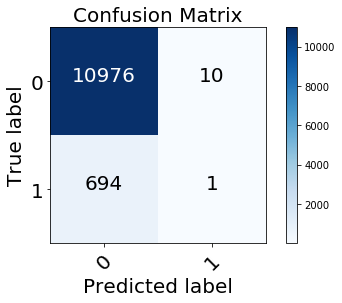

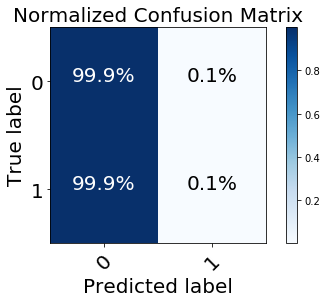

KNN CLASSIFIER
Accuracy: 67.01%
             precision    recall  f1-score   support

          0       0.95      0.68      0.80     10986
          1       0.08      0.45      0.14       695

avg / total       0.90      0.67      0.76     11681

Confusion Matrix
[[7512 3474]
 [ 379  316]]
Normalized Confusion Matrix
[[0.68 0.32]
 [0.55 0.45]]


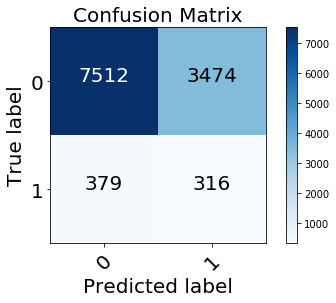

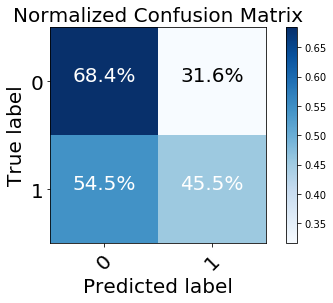

SVM CLASSIFIER


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=640).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy: 6.06%
             precision    recall  f1-score   support

          0       1.00      0.00      0.00     10986
          1       0.06      1.00      0.11       695

avg / total       0.94      0.06      0.01     11681

Confusion Matrix
[[   13 10973]
 [    0   695]]
Normalized Confusion Matrix
[[0. 1.]
 [0. 1.]]


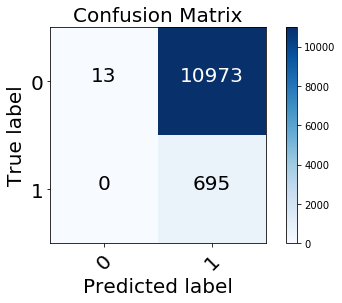

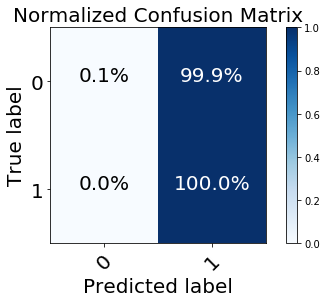

In [16]:
### NB Attempt ###
clf_NB_Gauss = GaussianNB()
clf_NB_Gauss.fit(train_data, train_labels)
print('NAIVE BAYES CLASSIFIER')
summarize_results(clf_NB_Gauss)

### KNN Attempt ###
print('KNN CLASSIFIER')
clf_neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=8)  #Accuracy plateaus around n=10, all 0's
clf_neigh.fit(train_data, train_labels)
summarize_results(clf_neigh)

#### SVM Attempts ###
print('SVM CLASSIFIER')
clf_SVM = svm.SVC(kernel='rbf', C=1, max_iter=640, probability = True)  #max_iter=635 gives 6% accuracy ... need new approach / tuning
clf_SVM.fit(train_data, train_labels)
summarize_results(clf_SVM)

### Random Forest Classifier

Having had little success with the classifiers above, we next tried a random forest, which performed very well:

Accuracy: 97.40%
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     10986
          1       0.70      0.98      0.82       695

avg / total       0.98      0.97      0.98     11681

Confusion Matrix
[[10696   290]
 [   14   681]]
Normalized Confusion Matrix
[[0.97 0.03]
 [0.02 0.98]]


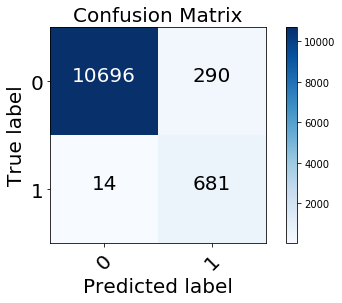

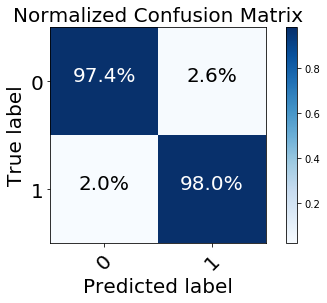

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 23, 'n_jobs': 8, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [17]:
### Random Forest Attempt ###
clf_RF = RandomForestClassifier(n_jobs=8, n_estimators=23)
clf_RF.fit(train_data, train_labels)
summarize_results(clf_RF)
print(clf_RF.get_params())

### Random Forest with GridSearchCV

We next tried Random Forest with GridSearchCV to further tune our parameters:

[mean: 0.97473, std: 0.00126, params: {'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 150}]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 150}
Accuracy: 98.13%
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     10986
          1       0.70      0.98      0.82       695

avg / total       0.98      0.97      0.98     11681

Confusion Matrix
[[10699   287]
 [   13   682]]
Normalized Confusion Matrix
[[0.97 0.03]
 [0.02 0.98]]


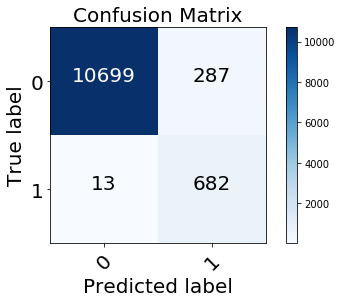

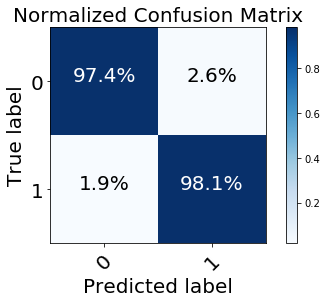

In [18]:
#RF Classifier with Grid Search
tuned_parameters = [{'n_estimators': [150],
                     'max_features': [20],
                     'min_samples_leaf': [2],
                     
                    }]

clf_GS_RF = GridSearchCV(RandomForestClassifier(n_jobs=8),
                   tuned_parameters,
                   #cv=4,
                   scoring='recall')
clf_GS_RF.fit(train_data, train_labels)
pprint(clf_GS_RF.grid_scores_)
pprint(clf_GS_RF.best_estimator_)
pprint(clf_GS_RF.best_params_)
summarize_results(clf_GS_RF)

The best parameters turned out to be max_features = 20, min_samples_leaf = 2, and n_estimators = 150, which produced a recall of 0.96890.

Of these parameters, n_estimators seemed to have the most effect on model performance, but it was still fairly small, and none of the parameters showed much difference (our total range was 0.0027, from 0.9662 - 0.9689).

To keep the run time down, we removed all the tuning trials for running multiple tuning parameters.  However, the results of those trials are listed below:

Output of 'print(clf_GS_RF.grid\_scores\_)':

**Tuning max_features, min_samples_leaf, and n_estimators**

* mean: 0.96619, std: 0.00077, params: {'max_features': 20, 'min_samples_leaf': 1, 'n_estimators': 40},
* mean: 0.96663, std: 0.00076, params: {'max_features': 20, 'min_samples_leaf': 1, 'n_estimators': 50},
* mean: 0.96782, std: 0.00066, params: {'max_features': 20, 'min_samples_leaf': 1, 'n_estimators': 100},
* mean: 0.96660, std: 0.00143, params: {'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 40},
* mean: 0.96786, std: 0.00028, params: {'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 50},
* mean: 0.96868, std: 0.00055, params: {'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 100},
* mean: 0.96816, std: 0.00048, params: {'max_features': 20, 'min_samples_leaf': 4, 'n_estimators': 40},
* mean: 0.96838, std: 0.00060, params: {'max_features': 20, 'min_samples_leaf': 4, 'n_estimators': 50},
* mean: 0.96853, std: 0.00101, params: {'max_features': 20, 'min_samples_leaf': 4, 'n_estimators': 100},
* mean: 0.96704, std: 0.00057, params: {'max_features': 20, 'min_samples_leaf': 8, 'n_estimators': 40},
* mean: 0.96786, std: 0.00032, params: {'max_features': 20, 'min_samples_leaf': 8, 'n_estimators': 50},
* mean: 0.96734, std: 0.00089, params: {'max_features': 20, 'min_samples_leaf': 8, 'n_estimators': 100},
* mean: 0.96704, std: 0.00016, params: {'max_features': 40, 'min_samples_leaf': 1, 'n_estimators': 40},
* mean: 0.96753, std: 0.00068, params: {'max_features': 40, 'min_samples_leaf': 1, 'n_estimators': 50},
* mean: 0.96819, std: 0.00080, params: {'max_features': 40, 'min_samples_leaf': 1, 'n_estimators': 100},
* mean: 0.96838, std: 0.00024, params: {'max_features': 40, 'min_samples_leaf': 2, 'n_estimators': 40},
* mean: 0.96819, std: 0.00064, params: {'max_features': 40, 'min_samples_leaf': 2, 'n_estimators': 50},
* mean: 0.96860, std: 0.00048, params: {'max_features': 40, 'min_samples_leaf': 2, 'n_estimators': 100},
* mean: 0.96868, std: 0.00046, params: {'max_features': 40, 'min_samples_leaf': 4, 'n_estimators': 40},
* mean: 0.96860, std: 0.00009, params: {'max_features': 40, 'min_samples_leaf': 4, 'n_estimators': 50},
* mean: 0.96827, std: 0.00027, params: {'max_features': 40, 'min_samples_leaf': 4, 'n_estimators': 100},
* mean: 0.96834, std: 0.00032, params: {'max_features': 40, 'min_samples_leaf': 8, 'n_estimators': 40},
* mean: 0.96860, std: 0.00069, params: {'max_features': 40, 'min_samples_leaf': 8, 'n_estimators': 50},
* mean: 0.96864, std: 0.00059, params: {'max_features': 40, 'min_samples_leaf': 8, 'n_estimators': 100}]

** Further tuning n_estimators**

* mean: 0.96842, std: 0.00073, params: {'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 100},
* mean: 0.96890, std: 0.00082, params: {'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 150},
* mean: 0.96838, std: 0.00078, params: {'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 200}]

### XGBoost Classifier

Having seen strong performance from Random Forest models, we next tried an XGBoost classifier:

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 97.11%
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     10986
          1       0.68      0.97      0.80       695

avg / total       0.98      0.97      0.97     11681

Confusion Matrix
[[10667   319]
 [   18   677]]
Normalized Confusion Matrix
[[0.97 0.03]
 [0.03 0.97]]


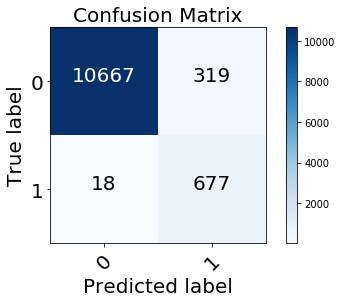

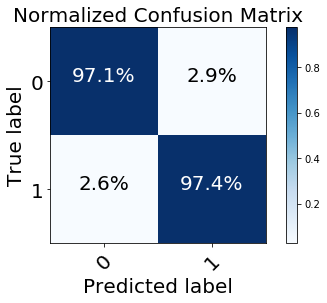

In [19]:
#Basic XGB Classifier
clf_XGB = xgboost.XGBClassifier(n_jobs=8)
clf_XGB.fit(train_data, train_labels)
summarize_results(clf_XGB)

The results of the XGBoost classifier were also very promising.  With no tuning, they weren't quite as good as the Random Forest, but they were very close.

### XGBoost with GridSearchCV

We next tried XGBoost with GridSearchCV to further tune our parameters:

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

Accuracy: 97.84%
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     10986
          1       0.71      0.98      0.83       695

avg / total       0.98      0.98      0.98     11681

Confusion Matrix
[[10713   273]
 [   15   680]]
Normalized Confusion Matrix
[[0.98 0.02]
 [0.02 0.98]]


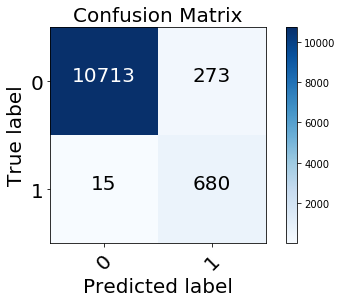

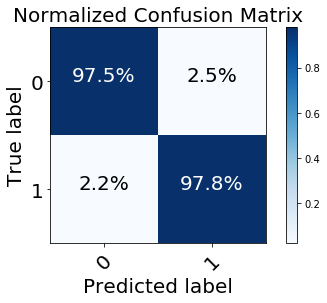

In [20]:
#XGB Classifier with Grid Search
tuned_parameters = [{'reg_lambda': [0.01],
                     #'learning_rate': [0.01, 0.1, 1],
                     #'max_depth': [3, 5, 7, 9],
                     'max_depth': [5],  #Landed on 5
                     #'min_child_weight': [1, 3, 5],
                     'min_child_weight': [1],  #Landed on 1
                     #'gamma':[i/10.0 for i in range(0,5)],
                     'gamma':[0.01],  #Landed on 0.01
                     #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100], #NEXT TRY THIS, BUT NOT WITH COMBO ABOVE
                     'reg_alpha':[0.1],
                    }]

clf_GS_XGB = GridSearchCV(xgboost.XGBClassifier(n_jobs=8),
                   tuned_parameters,
                   #cv=4,
                   scoring='recall')
clf_GS_XGB.fit(train_data, train_labels)
summarize_results(clf_GS_XGB)

From the code and results shown above, we were able to get results that slightly exceeded the Random Forest model.

To keep the run time down, we commented out the cells that ran multiple tuning parameters.  However, the results of those trials are as follows:

Output of 'print(clf_GS_XGB.grid\_scores\_)':

**Tuning max depth and min child weight**

* mean: 0.96971, std: 0.00072, params: {'max_depth': 3, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.96990, std: 0.00064, params: {'max_depth': 3, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.96990, std: 0.00061, params: {'max_depth': 3, 'min_child_weight': 5, 'reg_lambda': 0.01}
* mean: 0.97012, std: 0.00023, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.97042, std: 0.00014, params: {'max_depth': 5, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.96983, std: 0.00055, params: {'max_depth': 5, 'min_child_weight': 5, 'reg_lambda': 0.01}
* mean: 0.96994, std: 0.00048, params: {'max_depth': 7, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.97038, std: 0.00125, params: {'max_depth': 7, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.97031, std: 0.00026, params: {'max_depth': 7, 'min_child_weight': 5, 'reg_lambda': 0.01}
* mean: 0.97038, std: 0.00096, params: {'max_depth': 9, 'min_child_weight': 1, 'reg_lambda': 0.01}
* mean: 0.97057, std: 0.00115, params: {'max_depth': 9, 'min_child_weight': 3, 'reg_lambda': 0.01}
* mean: 0.97038, std: 0.00024, params: {'max_depth': 9, 'min_child_weight': 5, 'reg_lambda': 0.01}

**Tuning reg_alpha (with optimal values from above)**

* mean: 0.97005, std: 0.00018, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1e-05, 'reg_lambda': 0.01}
* mean: 0.97012, std: 0.00052, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.01, 'reg_lambda': 0.01}
* mean: 0.97016, std: 0.00016, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97009, std: 0.00045, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 0.01}
* mean: 0.96738, std: 0.00057, params: {'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 100, 'reg_lambda': 0.01}

**Tuning gamma (with optimal values from above)**

* mean: 0.97016, std: 0.00016, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97020, std: 0.00029, params: {'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97001, std: 0.00028, params: {'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97016, std: 0.00083, params: {'gamma': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
* mean: 0.97012, std: 0.00056, params: {'gamma': 0.4, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}

In [21]:
print(clf_GS_XGB.score(dev_data, dev_labels))

0.9784172661870504


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Final Run on Test Data

The cell below runs our best model on the not-yet-touched test data:

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 98.31%
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      6609
          1       0.71      0.98      0.83       415

avg / total       0.98      0.98      0.98      7024

Confusion Matrix
[[6444  165]
 [   7  408]]
Normalized Confusion Matrix
[[0.98 0.02]
 [0.02 0.98]]


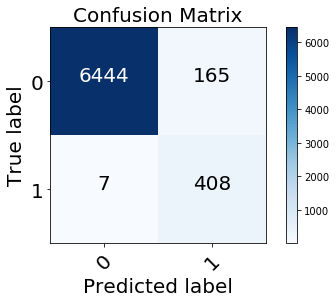

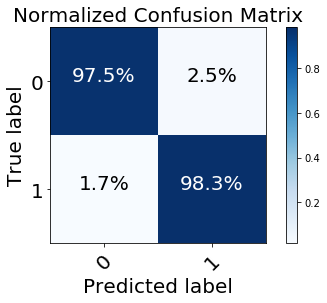

In [22]:
summarize_results(clf_GS_XGB, test_data, test_labels)

The test results confirm the same strong findings we saw in the dev data.

## Modeling Results

Here are the key points summarizing our predictive modeling findings:

* XGBoost worked the best, slightly outperforming Random Forest.  No other model we tried came close to their results.
* Scores:
    * We achieved a recall of 97.8% with the dev data, and 98.3% with the test data (not used to tune any of the models), which resulted in correctly predicting 680 / 408 users who churned and only missing 15 / 7 in the dev / test data, respectively.
    * Our false positive rate was 2.5% in both the dev and test data, incorrectly predicting 273 / 165 users who actually did not churn in the dev / test data, respectively.  The economic modeling below will give more insight into if these levels are acceptable, but they seem quite good for now.
* In our initial models, we had not yet peformed the 50/50 spilt of the training data, and our best recall score (of the dev data) was 78%.  Upon making this change to 50/50, our recall score of our best models improved dramattically, to 96%!
* Additional feature engineering proved useful also.  Notably, adding features of date interactions (expiry date, last transaction, and last usage, along with the differences among these dates), reduced false positives in our dev data from 415 to 273, a big improvement.

# 4. Calculating Probabilities

Our model has shown very promising results both in terms of recall and accuracy, meaning we can accurately predict which customers will churn. However from a business perspective, we would also like to go further and look at the probability of churn, in order to determine how much should be spent to prevent churn. 

When looking at probility we want to ensure that it is accurately calibrated (ie when the model predicts 60% probability of churn, 60% of customers did churn). We can do this by creating a calibration plot. 

When we performed the train/dev/test split, we kept a 50% churn proportion in the train dataset, but a 6% (native) churn proportion in both the dev and test splits. Therefore, because we trained on the train dataset, but our proportions are very different between train/dev datasets, our calibration is very innacurate:

In [23]:
def plot_calibration(models, testing_data, testing_labels, title):
    """ This function plots calibration plot using sklearn packages in order to visualize
    the efficiency in which models predict probabilities. It is based on the work presented
    in the sklearn documentation (http://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html).
    
    Also prints the brier score for reference.
    
    Args:
        models: A list of tuples that contain the pre-fit model (with predict_proba as a method)
            as well as a string of the name of the model
        testing_data: Data used for testing the pre-fit model. **Data should not have previously
            been used for testing
        testing_labels: Labels for the testing data
        title: String to be used as title for plot
        
    Returns:
        N/A: Prints plot to screen
    
    
    """
    plt.figure(figsize=(9, 9))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot([0,1], [0,1], 'k:', label='Perfect Calibration')
    for clf, name in models:
        #Get probabilities for the specific model using the test dataset
        prob_pos = clf.predict_proba(testing_data)[:,1]
        #Use sklearn calibraiton_curve implementation to extract data to plot in calibration curve
        frac_pos, mean_pred = calibration_curve(testing_labels, prob_pos, n_bins = 10)
        ax1.plot(mean_pred, frac_pos, "s-", label='%s' %(name,))
        ax2.hist(prob_pos, range=(0,1), bins=10, label=name, histtype='step', lw=2)
        #Print the Brier Score - used for quantifying calibration success
        print("%s Brier Score: %1.3f" %(name, brier_score_loss(testing_labels, prob_pos)))
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title(title)

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

Naive Bayes Brier Score: 0.060
Nearest Neighbors Brier Score: 0.243
Random Forest Brier Score: 0.027
Support Vector Machine Brier Score: 0.256
XG Boost Brier Score: 0.025
XG Boost Optimized Brier Score: 0.022


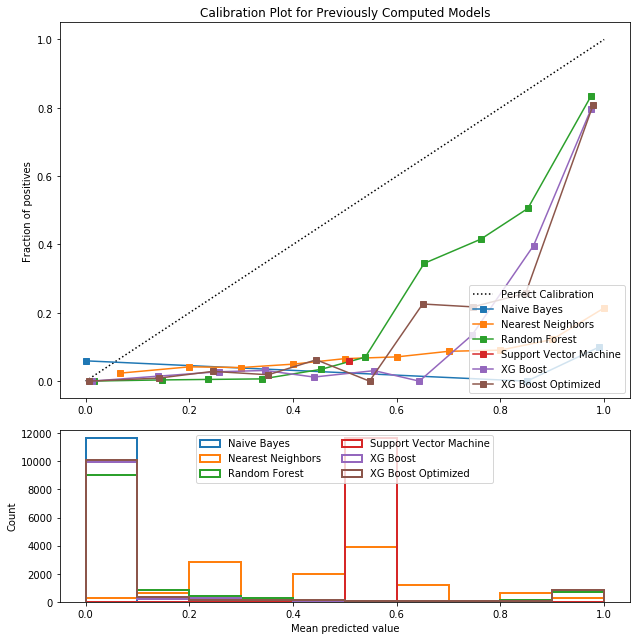

In [24]:
#Baseline score using models that were previously computed to optimize for recall and accuracy
model = [(clf_NB_Gauss, 'Naive Bayes'), 
                  (clf_neigh, 'Nearest Neighbors'),
                  (clf_RF, 'Random Forest'),
                  (clf_SVM, 'Support Vector Machine'),
                  (clf_XGB, 'XG Boost'),
                  (clf_GS_XGB, 'XG Boost Optimized')]
title = 'Calibration Plot for Previously Computed Models'
plot_calibration(model, dev_data, dev_labels, title)

Because of the very different proportion of churn data between the train and dev dataset, our calibration curves for all models performs very poorly. We therefore need to run a calibration model (trained on the dev set - which hasn't been used for training and provides the correct proportion of churn). Training using the dev set, we can then determine calibration efficiency by looking at the test set which until now has not been utilized. Due to the limited size of our dataset, we will train on the dev set, however an additional subset of data that hasn't previously been used would be a preferred approach and is recommended for future development. 

We can see the affect of different proportion churn datsets for train and test in the histogram underneath the calibration curve. We know that in the dev set 94% of the data is labeled 0 (so should have a small probability) however there are peaks around the 50% mark especially in the SVM model. This distorts the probability computation and causes the models to be poorly calibrated. 

We will start by training using the built in sklearn packages which utilizes Platt's scaling (fitting a logistic regression model) or isotonic calibration procedures. 

In [25]:
#Fit isotonic and sigmoid calibration to the XG Boost Model
clf_isotonic = CalibratedClassifierCV(clf_GS_XGB, cv = 2, method = 'isotonic')
clf_isotonic.fit(dev_data, dev_labels)

clf_sigmoid = CalibratedClassifierCV(clf_GS_XGB, cv = 2, method = 'sigmoid')
clf_sigmoid.fit(dev_data, dev_labels)

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

CalibratedClassifierCV(base_estimator=GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jo....01], 'reg_alpha': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0),
            cv=2, method='sigmoid')

The sklearn calibration functions utilize the dataset in raw form (rather than feeding in predicted probabilities from the prior model). Below when we implement our own model, we train on the former predicted model probabilities (clf_GS_XGB) to compute the calibrated model. 

XG Boost Brier Score: 0.021
XGB Isotonic Calibration Brier Score: 0.013
XGB Sigmoid Calibration Brier Score: 0.015


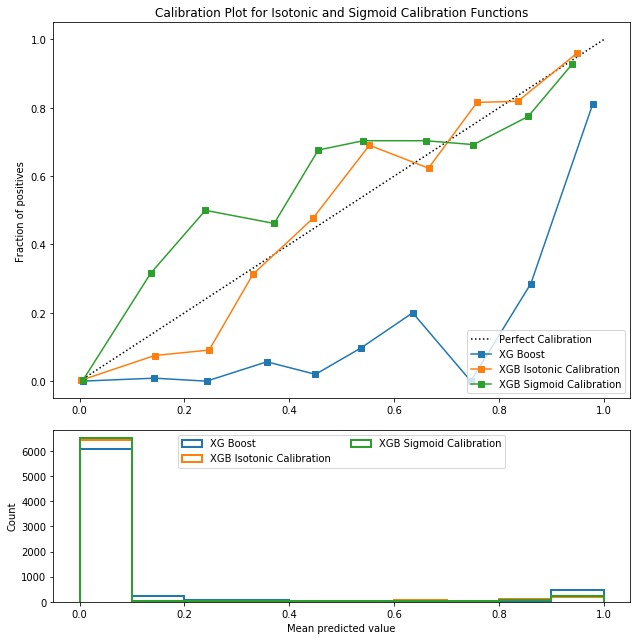

In [26]:
model =  [(clf_GS_XGB, 'XG Boost'),
                 (clf_isotonic, 'XGB Isotonic Calibration'),
                 (clf_sigmoid, 'XGB Sigmoid Calibration')]
title = 'Calibration Plot for Isotonic and Sigmoid Calibration Functions'
plot_calibration(model, test_data, test_labels, title)

We can see that both calibration procedures significantly improved over the non-calibrated XG-Boost method (we are calibrating on XG Boost because this provided the highest accuracy and recall). The isotonic calibration worked better than sigmoid. 

From the histogram plot we can see that most predictions have a low probability, which makes sense based on the skew in the dev and test datasets (only 6% churn). 

We then wanted to test other methods of calibration to determine if our own implementation would result in improved calibration. 

Logistic Regression Calibration Brier Score: 0.013
Random Forrest Calibration Brier Score: 0.017
Naive Bayes Calibration Brier Score: 0.020
SVM Calibration Brier Score: 0.011


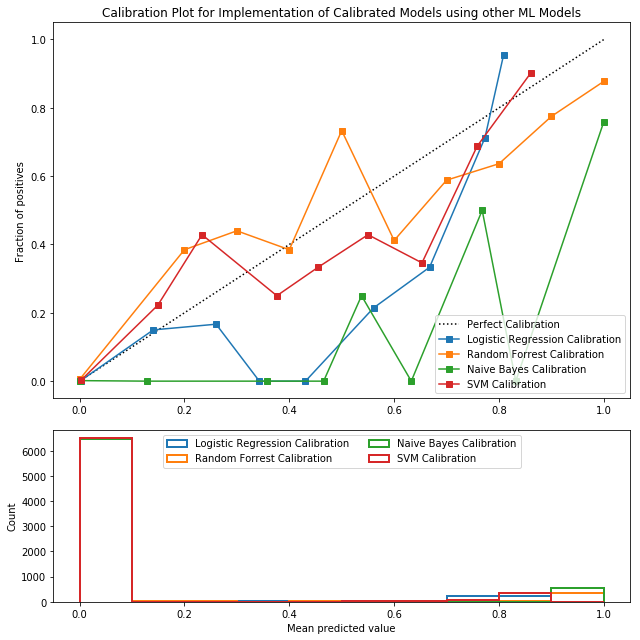

In [27]:
#Initialize models used for calibration
clf_LR_class = LogisticRegression()
clf_RF_class = RandomForestClassifier()
clf_NB_class = GaussianNB()
clf_SVM_class = svm.SVC(kernel='rbf', probability = True)

#Get probability data from the former model (XG Boost) in order to fit the calibration model
probs_dev = clf_GS_XGB.predict_proba(dev_data)[:, 1]
probs_dev = probs_dev.reshape(-1, 1)
probs_test = clf_GS_XGB.predict_proba(test_data)[:,1]
probs_test = probs_test.reshape(-1,1)
    
model = [(clf_LR_class, 'Logistic Regression Calibration'),
                 (clf_RF_class, 'Random Forrest Calibration'),
                 (clf_NB_class, 'Naive Bayes Calibration'),
                 (clf_SVM_class, 'SVM Calibration')]
#Fit the models used for calibration with the probability output from XG Boost
for clf, name in model:
    clf.fit(probs_dev, dev_labels)
title = 'Calibration Plot for Implementation of Calibrated Models using other ML Models'
plot_calibration(model, probs_test, test_labels, title)
    

Here we can see that our implementation, using the default hyperparameters for the sklearn modeling packages, improved the baseline accuracy (clf_GS_XGB). Additionally, while visually all lines appear to be less calibrated than the former calibration steps (isotonic and sigmoid), the brier score for the SVM implementation was actually lower (better) than the isotonic implementation. The dataset here was limited (5000 samples) and visually isotonic does appear to follow the 45 deg line more closely than SVM. We can see that in several locations SVM is very close to the 45 deg line which may help to bring down the brier score calculation on this limited dataset, but overall performance would be hindered. 

Because the intent of the calibration is to feed an economic model that will analyze probability of churn over a range of probabilities, we will utilize the isotonic calibration model as it stays closs to the 45 deg line throughout the range of probabilities where we would like to recommend action taken to prevent churn. 

Future work should involve larger datasets to validate the use of the isotonic calibration or support an alternative method. 

We can now use our calibrated probabilities to feed our economic model and allow business insight into the problem of business churn.


# 5. Economic Impact

## Economic model to plug into the business plan

To this point we have the following information:

    *Users who could churn (from the model)
    *Probability for churn (from the calibrated model)
    *Spending metrics (from the data)

Next step would be to guide the business on worthwhile spending to keep the customers at risk. We'll come up with a model for this spend (marketing spend) and then apply it to our data. The marketing spend can be used for loyalty programs, incentives or other kinds of tiered discounting programs. We'll keep the spend formfactor out of scope for this report. 

For the economic analysis, data has been provided in NTD (New Taiwan Dollars). This will be the currency used throughout this analysis.

### Coming up with the economic model for retention

We'll start with some metrics for the customer and business that are visible from the data or our feature list

    * Optimum lifetime value of a customer is assumed to be the revenue from the highest paying customer (for the purpose of this report). We calculate 2 metrics for this: 
        * Optimum lifetime value -OLTV- max paid/day from our sample
        * Optimum lietime value (3 years) - OLTV3y
        
    * Lifetime value of a customer is the actual revenue from the customer. We again consider 2 metrics for this:
        * Life time value - LTV - actuals from the customer/day
        * Life time value (3 years) - LTV3y
        
    * Average lifetime value of a customer is the average what's paid by our sample customers. The 2 metrics for this are:
        * Average life time value - ALTV - average/day
        * Average life time value (3 years) - altv3y
        
 The Average 3 year life value of a customer can help us make assumptions on what can be spend to acuire the customer in the first place (CAC). We're assuming that this value is 10% of the average lifetime value
    *CAC = .1 * altv3y
 
 Now know the value (revenue) of our customers and what it cost to acquire them. We'll move on to find out the spend to keep them. CAC is relevant as it helps us establish a ceiling for our retention/reacquisition cost (RAC) spend. We'll assert that the reacquistion cost for the customer cannot exceed 75% of the original acquisition cost.
     
We'd not want to spend the "reacquistion $" equally on all customers. We'd want to optimize this spend based on the forllowing: 

    * Value of the customer. ltv/oltv (lifetime value of a customer/lifetime value of our optimum customer) is a good representation of a customer value. It simplistic as leaves out all intangibles like social and support cost impact of some customers. We can easily extend our model for those factors
    
    * Risk of flight. The probability of churn is a good represention of this
    
Combining all of the above, we arrive at the following model for reacqusition spending (RAC)

    ** RAC = .75 * CAC * POC * (LTV/OLTV)**
    
We'll calculate this value individually for each customer.

An enchancement to our recommendation can be finding RAC clusters to suggest tiers of spending. We've not attempted that in this report.

### Probabilities from our model

In [28]:
# Get the probabilities for economic model
# We'll use the calibrated model

# Prediction probabilities
predictions_prob = clf_isotonic.predict_proba(dev_data)

# Predictions
predictions = clf_isotonic.predict(dev_data)

# Test

print ('''

Dev data shape: {}
Predictions shape: {}
Sample of predictions: {}
Prediction probabilities shape: {}
Sample of prediction probabilities: 
{}

'''.format(dev_data.shape, predictions.shape, predictions[:5], predictions_prob.shape ,predictions_prob[:5])
      )




Dev data shape: (11681, 159)
Predictions shape: (11681,)
Sample of predictions: [0 0 0 0 0]
Prediction probabilities shape: (11681, 2)
Sample of prediction probabilities: 
[[9.91e-01 8.57e-03]
 [9.98e-01 1.70e-03]
 [9.99e-01 1.18e-03]
 [1.00e+00 0.00e+00]
 [1.00e+00 2.04e-04]]




In [29]:
# Starting the marketing data frame

marketing_data = dev_data.copy(deep = True)


In [30]:
# Test
print('''
Marketing_data shape: {}

'''.format(marketing_data.shape)
     )


Marketing_data shape: (11681, 159)




In [31]:
# Adding predictions and probability (From the model)

marketing_data['predictions'] = predictions
marketing_data['probability_churn'] = predictions_prob[:,1]


### Lifetime value metrics for the customers

In [32]:
# Optimum life time value (per day ) can be represented by the max of "amount paid per day" among our sample

oltv = marketing_data['amount_paid_per_day'].max()
oltv3y = oltv * 365 * 3

print('''
Optimum lifetime value of the customer per day (NTD/day): NT${:,.2f}
Optimum lifetime value of the customer (3 Years) (NTD): NT${:,.2f}

'''.format(oltv, oltv3y)
     )



Optimum lifetime value of the customer per day (NTD/day): NT$13.45
Optimum lifetime value of the customer (3 Years) (NTD): NT$14,727.75




In [33]:
# Average lifetime value (ALTV) can be represented by spend/day 
# Over 3 years it helps us calculate the cost to acquire the customer (CAC)
# The business plan allows CAC to be 10% of revenue from the customer

altv = marketing_data['amount_paid_per_day'].mean()
altv3y = marketing_data['amount_paid_per_day'].mean() * 365 * 3
cac = .1 * altv3y

print('''
Average lifetime value of the customer per day (NTD/day): NT${:,.4f}
Average lifetime value of the customer: (3 Years) (NTD): NT${:,.4f}
Customer acquisition cost (NTD): NT${:,.4f}

'''.format(altv, altv3y, cac)
     )


Average lifetime value of the customer per day (NTD/day): NT$4.5435
Average lifetime value of the customer: (3 Years) (NTD): NT$4,975.1425
Customer acquisition cost (NTD): NT$497.5143




### Adding the reacquisition cost suggestion to our model
### RAC = .75 * CAC * POC * (LTV/OLTV)

In [34]:
# Reacquistion cost (marketing spend to prevent churn):
# RAC = .75 * CAC * POC * (LTV/OLTV)

print('''

Shape of predictions: {}
Shape of predictions_prob: {}
Shape of marketing_data['amount_paid_per_day']: {}

'''.format(predictions_prob[:,1].shape, predictions.shape, marketing_data['amount_paid_per_day'].shape)
     )
marketing_data['proposed_spend'] = ( .75 * cac
                                    * predictions_prob[:,1]
                                    * predictions
                                    * (marketing_data['amount_paid_per_day']/oltv)
                                    )




Shape of predictions: (11681,)
Shape of predictions_prob: (11681,)
Shape of marketing_data['amount_paid_per_day']: (11681,)




In [35]:
# Test
print(marketing_data.shape)
marketing_data.head()

(11681, 162)


,city,bd,registered_via,registration_init_time,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,latest_transaction_date_year,latest_transaction_date_month,latest_transaction_date_day,latest_transaction_date_absday,latest_expire_date_year,latest_expire_date_month,latest_expire_date_day,latest_expire_date_absday,latest_trans_vs_expire,latest_trans_vs_log,latest_log_vs_expire,registration_time,pre

### Validation
We're working out the following to make sure that the nubmers for the reacquistion marketing spend make sense in the context of our business:
    * Total marketing spend
    * Marketing spend per customer (all customers)
    * Marketing spend per customer with probability of churn (indicated as churn by the model)
    * Comparison with the earnings from the sample


In [36]:
# Validation
# What is the total proposed marketing spend? 
tpms = marketing_data['proposed_spend'].sum()
# Averaging (per user)
tpmsa = tpms/len(predictions)
# Averaging (for users marked for churn)
ch = np.count_nonzero(predictions)
tpmsac = tpms/ch

print('''
Total proposed marketing spend (NTD): NT${:,.0f}
Total number of users in the sample: {:d}
Average Reacquisition/retention marketing spend/user (NTD): NT${:,.4f}
Total number of users projected to churn (any probability): {:d}
Average Reacquisition/rention marketing spend for users marked to churn (NTD): NT${:,.4f}

''' .format(tpms, len(predictions), tpmsa, ch,  tpmsac)
     )


Total proposed marketing spend (NTD): NT$77,025
Total number of users in the sample: 11681
Average Reacquisition/retention marketing spend/user (NTD): NT$6.5940
Total number of users projected to churn (any probability): 705
Average Reacquisition/rention marketing spend for users marked to churn (NTD): NT$109.2551




In [37]:
# Validation
# How does the marketing spend compare to the projected earnings from this sample

# Ratio of marketing(per user) to topline for this sample
rms = (tpms/len(predictions))/altv3y

print('''
Projected 3 year earnings from users in dev data (per user) (NTD): NT${:,.4f}
Ratio of Reacquistion/Retention marketing to topline from users in dev data: {:.4f}

'''.format(altv3y, rms)
     )


Projected 3 year earnings from users in dev data (per user) (NTD): NT$4,975.1425
Ratio of Reacquistion/Retention marketing to topline from users in dev data: 0.0013




#### Visual for marketing spend - amoung spent/day by all the customers

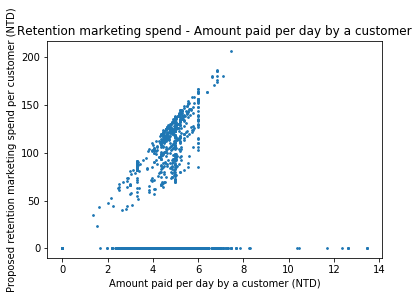

In [38]:
# Marketing spend - amount spent/day by the users
# plt.scatter(marketing_data['amount_paid_per_day'], marketing_data['proposed_spend'], s=4,
           #c=cm.hot(marketing_data['proposed_spend']))
    
plt.xlabel('Amount paid per day by a customer (NTD)')
plt.ylabel('Proposed retention marketing spend per customer (NTD)')
plt.title('Retention marketing spend - Amount paid per day by a customer')    
plt.scatter(marketing_data['amount_paid_per_day'], marketing_data['proposed_spend'], s=3)
plt.show()

The plot above looks at proposed retention spend by customer against the amount paid per day by customer. Some scatter exists in the plot showing that not all members at a specific NTD/day price level are equal in terms of risk of churn. The proposed retention spend is calculated over the three year (assumed lifetime) of the customer (so at a level of 100 NTD, the proposed incentive per day would be ~0.09 NTD). 

#### Visual for marketing spend in the context of the total number of customers

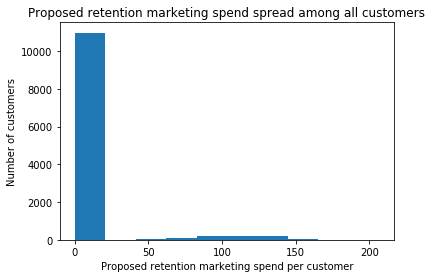

In [39]:
# Visual of spend in context of the number of users
plt.title('Proposed retention marketing spend spread among all customers')
plt.xlabel('Proposed retention marketing spend per customer')
plt.ylabel('Number of customers')
plt.hist(marketing_data['proposed_spend'] )
plt.show()

From the plot above, we can see that for most users, the proposed spend is 0, due to the predicted probability that they won't churn, and therefore no incentives should be offered. This makes economic sense as our dataset only contains 6% churn, and we cannot afford to offer incentives to too many members if their unlikely to churn. 

We do see that there is some data for proposed spend between 50-150 which is consistent with the former scatter plot, however overwhemingly the proposed spend on a customer is 0 NTD (New Taiwan Dollar). 

#### Visual for marketing spend per user

Text(0.5,1,'Sorted proposed spend on user over 3 year lifetime')

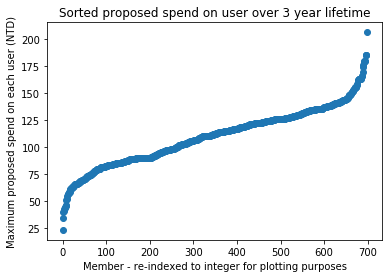

In [40]:
#Scatter Plot to Show Proposed Spend per User
sorted_marketing = marketing_data.sort_values(by='proposed_spend')
sorted_marketing = sorted_marketing[sorted_marketing['proposed_spend'] >0.0]['proposed_spend']
sorted_marketing = sorted_marketing.reset_index()
plt.scatter(sorted_marketing.index, sorted_marketing['proposed_spend'])
plt.xlabel('Member - re-indexed to integer for plotting purposes')
plt.ylabel('Maximum proposed spend on each user (NTD)')
plt.title('Sorted proposed spend on user over 3 year lifetime')

The plot above looks at the sorted proposed spend for users. The plot has been sorted in order to determine if there are any insights that can be made by looking at proposed spend levels. We can see near the 85 NTD (New Taiwan Dollar) mark there is a slight plateau, which could indicate a good level of incentive to offer users. 

Beyond the slight plateau the maximum proposed spend appears to increase approximately linearly over the range of 75 to 130 NTD. Indication from this plot shows that users who's proposed spend is >130 may not be worthwhile pursuing due to the high cost of incentives. 

The proposed spend is the maximum spend allocated over the customer lifetime (assumed 3 years) and would be distributed through discounts and incentives. It may be possible to prevent churn by offering less than this maximum spend amount, which is an opportunity for a future ML model. 

In [41]:
# Recap of key metrics

print('''
------> Key metrics from the model:

Total number of users in the sample: {}
Total number of users projected to churn (any probability): {}

Total proposed marketing spend: NT${:,.0f}
Total revenue (3 year) from all users in the sample: NT${:,.0f}
Total revenue (3 year) from users at risk in the sample: NT${:,.0f}

Average Reacquisition/retention marketing spend/user: {}
Average Reacquisition/retention marketing spend for users marked to churn: {}

Ratio of Reacquistion marketing spend to revenue from all users: {:.4f}
Ratio of Reacquistion marketing spend to reveuene from at risk users: {:.4f}

''' .format(len(predictions), ch, int(tpms), int(altv3y*len(predictions)),
            int(altv3y*ch), int(tpmsa), int(tpmsac),
           tpms/(int(altv3y*len(predictions))),
           tpms/int(altv3y*ch) )
     )


------> Key metrics from the model:

Total number of users in the sample: 11681
Total number of users projected to churn (any probability): 705

Total proposed marketing spend: NT$77,024
Total revenue (3 year) from all users in the sample: NT$58,114,639
Total revenue (3 year) from users at risk in the sample: NT$3,507,475

Average Reacquisition/retention marketing spend/user: 6
Average Reacquisition/retention marketing spend for users marked to churn: 109

Ratio of Reacquistion marketing spend to revenue from all users: 0.0013
Ratio of Reacquistion marketing spend to reveuene from at risk users: 0.0220




## Economic Impact Summary

We're able to create a very usable model for the retention/reacquistion effort in the business.  In summary, of our NT\$58M 3-year revenue from our customer base, we estimate we will lose NT\$3.5M to churn.  Accounting for the probability that users will actually churn, the team recommends spending NT\$77K on trying to retain these users.  In the marketing data, the NT\$77K is broken down by user, however, we would recommend a discount program with a few tiers, as opposed to custom offers for every user.

The marketing data base keeps most original customer parameters and adds the following for use in business planning:

* predictions - Will the customer churn (1 will churn)
* predctions_prob - What's the probability of the customer leaving (Higher is bad)
* proposed_spend - We can spend up to this value to keep this customer
    
Our calculations (mostly for validation in the report) show that the retention marketing spend is inline with the revenue opportunity for the business. Key metrics are calculated again above.
 
One caveat to our assertion is effectiveness of reacquistion marketing spend. Feedback on that could influence the value of our spend as we put the model into production.

Another thing to note in our model is that we're proposing a spend for every customer at risk. Reality may be that we cannot save customers above 80% probability of churn. Should we invest in these users?

# 6. Final Insights and Takeaways

Here are our insights and commentary from our analysis:



## Predictive Modeling Summary and Future Considerations

As discussed in the modeling section, the final model had a recall performance of 98.3% (on the test data), correctly predicting almost every user who actually churned (408 of 415 users), and also correctly predicting amost every user who would actually stay (6,444 of 6,609 users).

Given the strong performance of the current model, any future enhancements would need to balance the cost of making those enhancements against the potential benefits of retaining a few more users.  That said, the team thinks the best place to find additional gains in the model is by engineering additional features from the users, potentially from reviewing user listening habits such as music genre.

## Economic Impact

We created and validated a model to guide retention program spending for customers at the risk of churn (**RAC = .75 * CAC * POC * (LTV/OLTV)** where RAC is the Reacquistion cost or retention spending/customer, CAC is the cost of customer acquistion, LTV is the lifetime value of a customer and OLTV is the optimum lifetime value (the revenue from our best customer). 

The model works with a spend ceiling (Customer acquisiton cost) that's about 10% of the lifetime value of an average customer. We stay below this limit by reducing the amount by value of the customer and her probability of churn. 

A sample run with our development data shows a total marketing spend between 77K to protect ~3.5 M of revenue. The model shows how this amount can be divvied up among the customers (in the marketing data frame).

A production version of this model can guide the business on both the candidates and amount for retention spending among the customer base.



## Productization and Future Development
### Implementation as a pipeline, performance testing and feedback loop

Our assessment is that at least the following would have to be done to put the model into production:

    * Implementation as a pipeline: The model is quite efficient and can be implemented offline or a near realtime implementation
        *For a offline implementation, data can be picked up from backup databases and pumped into a system like HDFS. Calculations on predictions can then be done by compute on Hadoop or an application like SPARK   
        *A new realtime pipeline can be built by duplicating usage and transaction events to a KAFKA--->SPARK--->HDFS pipeline for writing and then batch processing similar to above
        
    *Performance testing: Further performance testing is recommended for both an offline or realtime pipeline. Our testing was with a small subset on a laptop and may not reflect the needs of the enterprise
    
    *Feedback loop: A feedback loop and experiments for following could increase the efficacy of the model
        *Predictions: Feedback on predictions can be implemented by having a small control group where we do not use our retention methods
        *Retention spending: Feedback on our retention methods can directly come from the group on which we are using the methods. In the simplest case we'll just have to find out if the customer stayed with the service
        *Models and calibration: Testing and calibration would be needed about once in a Q
        
The goal of above would be to maintain or improve the performance vs accuracy/recall for the model while rolling it out to growing customer cohorts. From this analysis, we hope to provide insight into customers that have a potential to churn, and recommend incentives for those customers to prevent churn. We believe that the future work listed above will help to make a significant impact in business operations which will generate more revenue and profit for the company.

An additional topic that could be explored in the future is understanding at what incentive level a user won't churn. Here we present the maximum incentive spend (over a 3 year span) for a customer, however from a business sens we would like to offer the minimum incentive to prevent churn. This model can build on what has alredy been developed here and will require additional data to capture incentives that have previously been offered and the outcome of the offering. 